# Unsupervised Learning

Unsupervised learning in artificial intelligence is a type of machine learning that learns from data without human supervision. Unlike supervised learning, unsupervised machine learning models are given unlabeled data and allowed to discover patterns and insights without any explicit guidance or instruction.

In this lecture, we will learn several clustering algorithms and its implementation in python.

## clustering 

Clustering is the most common example of unsupervised tasks. In a clustering task, we hypothesize that the data may be naturally divided into dense clusters. The purpose of a clustering algorithm is to find these clusters. 

This lecture is based on the chapter [*In Depth: k-Means Clustering*](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html) of the [*Python Data Science Handbook*](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

Let's start by generating some synthetic data. The `make_blobs()` function will create a user-specified number of "blobs" of data, each of which are reasonably well-separated from each other. Under the hood, it does this by assigning a true label to each data point, which it then returns as `y_true`. However, in a standard clustering task, we would not assume that the true labels exist, and we won't use them here. 

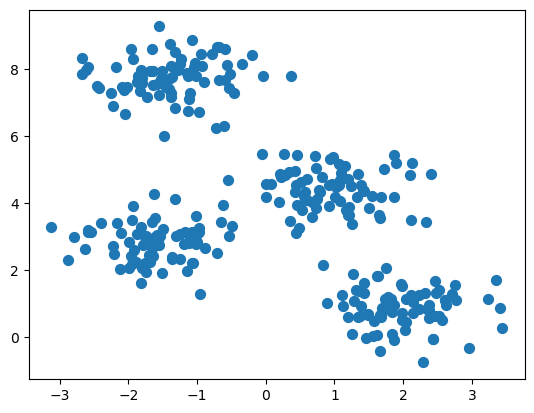

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

fig, ax = plt.subplots(1)
ax.scatter(X[:, 0], X[:, 1], s=50);

## K-means

k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid).

Given k clusters, we want to find clusters $S = \{S_1, S_2, \dots, S_k\}$ so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). Formally, the objective is to find:

$$ \mathop{ \mathrm{argmin} }_S \sum_{i=1}^{k} \sum_{x\in S_i} \|x-\mu_i\|^2, $$

where $\mu_i = \frac{1}{|S_i|} \sum_{x \in S_i} x$ is the mean (also called centroid) of points in $S_i$.

Let's import KMeans and see how we do:

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

To get cluster labels, we use the predict() method:

In [4]:
y_kmeans = kmeans.predict(X)

In [5]:
y_kmeans

array([1, 0, 2, 0, 1, 1, 3, 2, 0, 0, 3, 0, 2, 0, 1, 2, 2, 1, 3, 3, 1, 1,
       2, 3, 3, 2, 1, 2, 3, 2, 0, 0, 2, 0, 0, 0, 0, 0, 3, 1, 2, 3, 2, 2,
       3, 3, 0, 3, 0, 1, 3, 1, 0, 1, 1, 3, 0, 3, 0, 1, 0, 2, 0, 3, 3, 3,
       0, 1, 0, 3, 2, 3, 0, 3, 3, 0, 3, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2,
       0, 0, 2, 1, 0, 3, 3, 2, 1, 1, 2, 3, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2,
       3, 3, 1, 0, 1, 2, 0, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 0, 3,
       3, 1, 0, 3, 3, 0, 2, 0, 0, 3, 2, 3, 2, 3, 0, 2, 0, 0, 0, 2, 0, 2,
       1, 3, 0, 3, 1, 2, 0, 2, 2, 1, 2, 3, 3, 2, 1, 2, 2, 0, 1, 2, 3, 0,
       1, 1, 2, 3, 1, 2, 3, 3, 2, 2, 2, 2, 1, 0, 2, 3, 2, 2, 3, 3, 3, 2,
       3, 0, 2, 3, 1, 3, 2, 0, 3, 0, 2, 0, 2, 3, 2, 2, 0, 3, 3, 1, 1, 2,
       0, 1, 1, 3, 1, 3, 2, 0, 0, 2, 2, 0, 2, 1, 3, 2, 1, 3, 0, 3, 1, 2,
       1, 0, 0, 0, 0, 3, 3, 0, 2, 3, 1, 2, 3, 3, 3, 1, 1, 0, 2, 2, 3, 1,
       0, 3, 2, 0, 2, 1, 1, 3, 3, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1,
       0, 3, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 3], d

Now let's visualize the results. The use of the c and cmap arguments to ax.scatter() allow us to easily plot points of multiple colors.

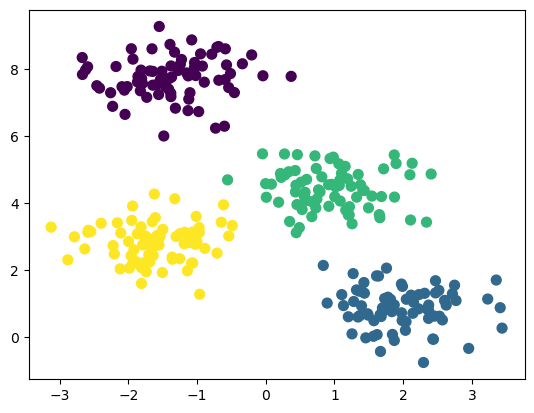

In [6]:
fig, ax = plt.subplots(1)

ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

Under the hood, `k-means` tries to identify a "centroid" for each cluster. The two main principles are: 

1. Each centroid is the mean of all the points to which it corresponds. 
2. Each point is closer to its centroid than to any other centroid. 

The `KMeans` class makes it easy to retrieve the cluster centroids and visualize them. 

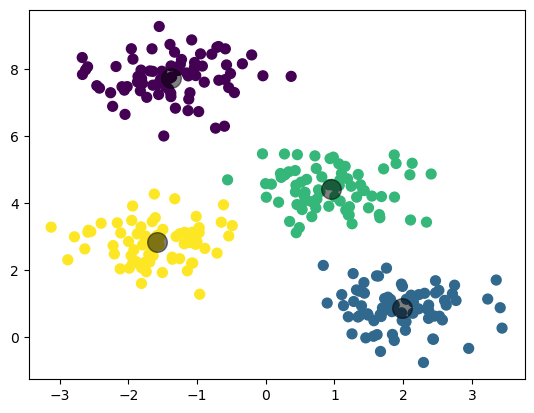

In [7]:
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
fig

In [8]:
centers

array([[-1.37324398,  7.75368871],
       [ 1.98258281,  0.86771314],
       [ 0.94973532,  4.41906906],
       [-1.58438467,  2.83081263]])

We can see that the cluster centroids do indeed correspond pretty nicely to the "middle" of each of the identified clusters.

#### Number of clusters is a hyperparameter

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


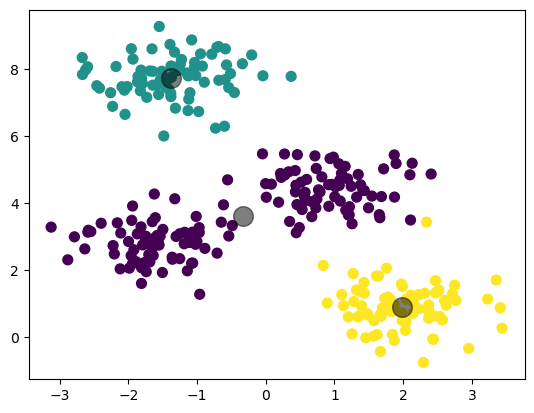

In [9]:
# 3 clusters 

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)

fig, ax = plt.subplots(1)

ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


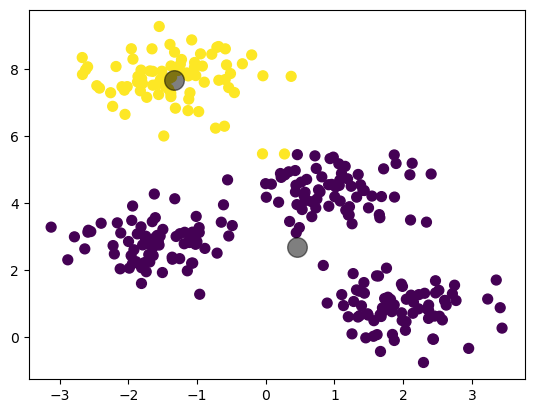

In [10]:
# 2 clusters 

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)

fig, ax = plt.subplots(1)

ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

To determine the optimal number of clusters, we’ll create a plot that displays the number of clusters along with the SSE (sum of squared errors) of the model.

We will then look for an “elbow” where the sum of squares begins to “bend” or level off. This point represents the optimal number of clusters.

The following code shows how to create this type of plot that displays the number of clusters on the x-axis and the SSE on the y-axis:

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/clust

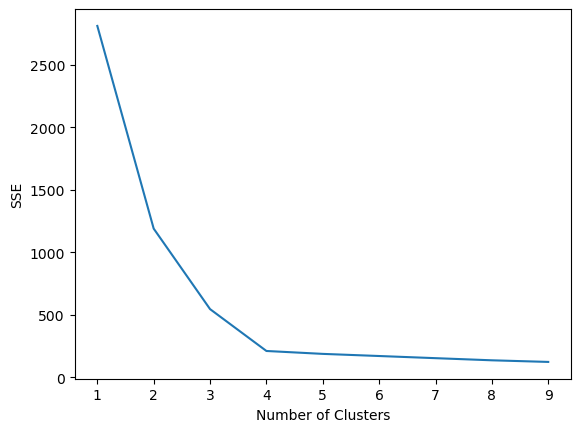

In [11]:
sse = []

for i in range(1,10):
    
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,10), sse)
plt.xticks(range(1,10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

## Spectral clustering

Kmeans is a good method but it does not work sometimes,

![](https://editor.analyticsvidhya.com/uploads/64690spect%20vs%20nnfs.png)

*Images from Analytics Vidhya*

Spectral clustering is another method which is based on graphs and eigendecompositions. 

The three major steps involved in spectral clustering are: constructing a similarity graph, projecting data onto a lower-dimensional space, and clustering the data. Given a set of points S in a higher-dimensional space, it can be elaborated as follows:

1. Form a distance matrix

2. Transform the distance matrix into an affinity matrix A

3. Compute the degree matrix D and the Laplacian matrix L = D – A.

4. Find the eigenvalues and eigenvectors of L.

5. With the eigenvectors of k largest eigenvalues computed from the previous step form a matrix.

6. Normalize the vectors.

7. Cluster the data points in k-dimensional space.


Why does it work? Let's look at the following example:

Suppose that we have a graph, then we can design adjancency matrix A

In [12]:
# Simple example to verify it:
A = np.zeros([4,4])
A[0,1], A[1,0] = 1, 1
A[2,3], A[3,2] = 1, 1
D = np.eye(4)
L = D-A
U,S = np.linalg.eigh(L)
print(U)
print(S)

[0. 0. 2. 2.]
[[-0.70710678 -0.          0.         -0.70710678]
 [-0.70710678 -0.          0.          0.70710678]
 [-0.         -0.70710678 -0.70710678  0.        ]
 [-0.         -0.70710678  0.70710678  0.        ]]


In [13]:
# example 2:
A = np.zeros([4,4])
A[0,1], A[1,0] = 1, 1
A[0,2], A[2,0] = 1, 1
A[2,3], A[3,2] = 1, 1
D = np.diag(np.array([2,1,2,1]))
L = D-A
U,S = np.linalg.eigh(L)
print(U)
print(S)

[-3.74056883e-16  5.85786438e-01  2.00000000e+00  3.41421356e+00]
[[ 0.5        -0.27059805  0.5        -0.65328148]
 [ 0.5        -0.65328148 -0.5         0.27059805]
 [ 0.5         0.27059805  0.5         0.65328148]
 [ 0.5         0.65328148 -0.5        -0.27059805]]


In [14]:
# example 3:
A = np.zeros([4,4])
A[0,1], A[1,0] = 1, 1
A[0,2], A[2,0] = 1, 1
A[1,2], A[2,1] = 1, 1
A[2,3], A[3,2] = 1, 1
D = np.diag(np.array([2,2,3,1]))
L = D-A
U,S = np.linalg.eigh(L)
print(U)
print(S)

[3.063943e-17 1.000000e+00 3.000000e+00 4.000000e+00]
[[ 5.00000000e-01 -4.08248290e-01  7.07106781e-01 -2.88675135e-01]
 [ 5.00000000e-01 -4.08248290e-01 -7.07106781e-01 -2.88675135e-01]
 [ 5.00000000e-01  2.22044605e-16 -5.55111512e-16  8.66025404e-01]
 [ 5.00000000e-01  8.16496581e-01 -1.11022302e-16 -2.88675135e-01]]


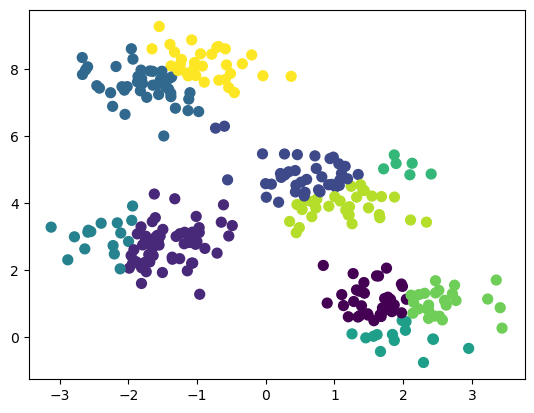

In [15]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=10)
# fit model and predict clusters
y_spectral = spectral.fit_predict(X)

fig, ax = plt.subplots(1)

ax.scatter(X[:, 0], X[:, 1], c=y_spectral, s=50, cmap='viridis')

#### Advantages of Spectral Clustering:

- Scalability: Spectral clustering can handle large datasets and high-dimensional data, as it reduces the dimensionality of the data before clustering.
- Flexibility: Spectral clustering can be applied to non-linearly separable data, as it does not rely on traditional distance-based clustering methods.
- Robustness: Spectral clustering can be more robust to noise and outliers in the data, as it considers the global structure of the data, rather than just local distances between data points.

#### Disadvantages of Spectral Clustering:

- Complexity: Spectral clustering can be computationally expensive, especially for large datasets, as it requires the calculation of eigenvectors and eigenvalues.
- Model selection: Choosing the right number of clusters and the right similarity matrix can be challenging and may require expert knowledge or trial and error.

## DBSN: Density-based spatial clustering of applications with noise

The DBSCAN algorithm can be abstracted into the following steps:

1. Find the points in the $\epsilon$ neighborhood of every point, and identify the core points with more than minPts neighbors.
2. Find the connected components of core points on the neighbor graph, ignoring all non-core points.
3. Assign each non-core point to a nearby cluster if the cluster is an ε (eps) neighbor, otherwise assign it to noise.

![](https://upload.wikimedia.org/wikipedia/commons/a/af/DBSCAN-Illustration.svg)

*Images from Wikipedia.*

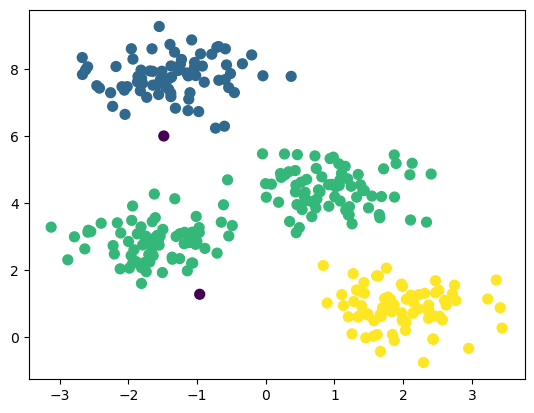

In [16]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.71, min_samples=3)
# fit model and predict clusters
y_dbscan = dbscan.fit_predict(X)

fig, ax = plt.subplots(1)

ax.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')

# Hierarchical Clustering

Hierarchical clustering is one of the popular and easy to understand clustering technique. This clustering technique is divided into two types:
1. Agglomerative
2. Divisive (not often used)

#### Agglomerative Hierarchical clustering Technique: 
In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.
The basic algorithm of Agglomerative is straight forward.
1. Compute the proximity matrix
2. Let each data point be a cluster
3. Repeat: Merge the two closest clusters and update the proximity matrix
4. Until only a single cluster remains

![](https://miro.medium.com/v2/resize:fit:848/format:webp/1*3pMZjFiiaaLcfSZBKDjbXA.png)
*Image from Towards data science*


Key operation is the computation of the proximity of two clusters, here are several examples.

- MIN: also called single-linkage algorithm. The similarity of two clusters C1 and C2 is equal to the **minimum** of the similarity between points Pi and Pj such that Pi belongs to C1 and Pj belongs to C2.
- MAX
- Group Average
- Distance Between Centroids
- Ward’s Method


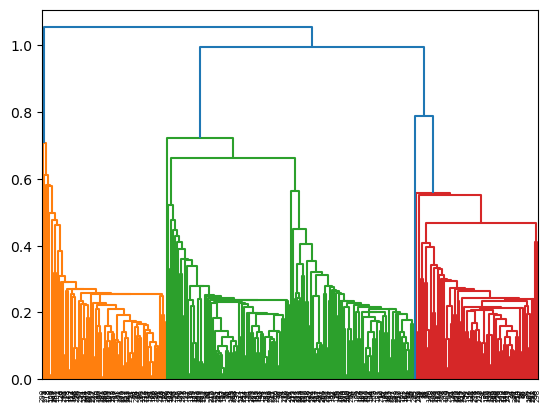

In [17]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(X, 'single')
dn = hierarchy.dendrogram(Z)

x-axis includes points and y-axis is the distace between clusters.

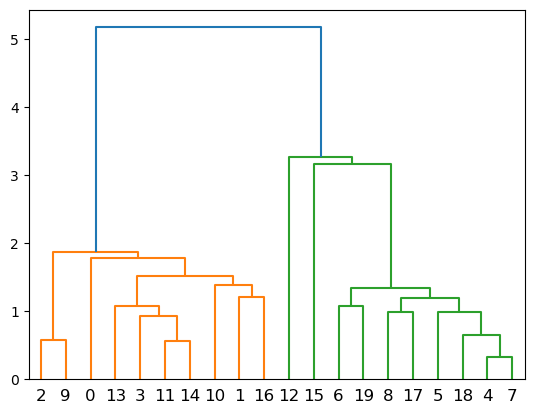

In [18]:
# another example to make x-axis more clear

from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=20, centers=2,
                       cluster_std=2)


from scipy.cluster import hierarchy
Z = hierarchy.linkage(X, 'single')
dn = hierarchy.dendrogram(Z)

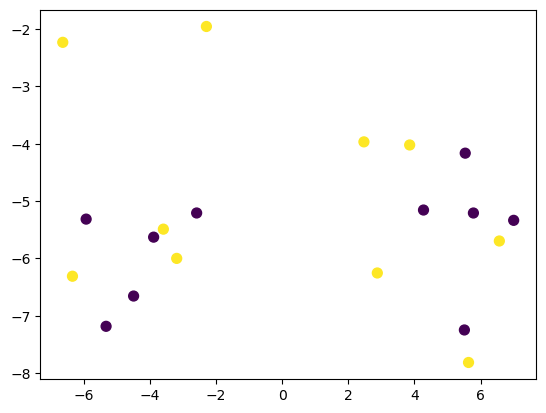

In [19]:
c = [k-k for k in range(20) ]
L = [10,12,0,2,6,15,7,18,1,14]
for i in L:
    c[i] = 1
plt.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis', s=50);